# Decode keypoints from neural data

In [3]:
%load_ext autoreload
%autoreload 2

import os
import sys

sys.path.append("../../")


import pyaldata as pyal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from tools.reports.report_initial import run_initial_report
from tools.params import Params, colors
from tools.dsp.preprocessing import preprocess
import tools.viz.mean_firing as firing
import tools.viz.dimensionality as dim
import tools.viz.rrr as viz_rrr
import tools.viz.utilityTools as vizutils
import tools.decoding.rrr as rrr

import tools.decoding.decodeTools as decutils
import tools.dataTools as dt

import torch
import scipy

import pickle
from tools.decoding.lstm import KeypointsLSTM






In [2]:
data_dir = "/data/bnd-data/raw/"
session = 'M062_2025_03_21_14_00'

df = pyal.load_pyaldata(data_dir + session[:4] + '/' + session)
df = preprocess(df, only_trials=False)

field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field all_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
field values_Sol_direction could not be converted to int.
field idx_Sol_direction could not be converted to int.
field values_Sol_duration could not be converted to int.
field idx_Sol_duration could not be converted to int.
field idx_sol_on could not be converted to int.
array field all_KSLabel could not be converted to int.
array field SSp_KSLabel could not be converted to int.
array field VAL_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.
field values_Sol_direction could not be converted t

/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_X might be a time-varying field. It matches the length of all_spikes on 99.85875706214689% of trials
  warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_X might be a time-varying field. It matches the length of all_spikes on 99.85875706214689% of trials
  warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/utils.py:155: UserWarning: values_MotSen1_Y might be a time-varying field. It matches the length of all_spikes on 99.85875706214689% of trials
  warnings.warn(
/home/me24/.cache/pypoetry/virtualenvs/earthquake-analysis-Z8riI-lB-py3.12/src/PyalData/pyaldata/utils.py:155: UserWarning: idx_MotSen1_Y might be a time-varying field. It matches the length of all_spikes on 99.85875706214689% of tr

Combined every 3 bins
Resulting all_spikes ephys data shape is (NxT): (23, 16000)
Resulting SSp_spikes ephys data shape is (NxT): (66, 16000)
Resulting VAL_spikes ephys data shape is (NxT): (122, 16000)
Resulting CP_spikes ephys data shape is (NxT): (280, 16000)
Resulting MOp_spikes ephys data shape is (NxT): (179, 16000)


In [43]:
df.bin_size.values[0]

0.03

## Lstm class

In [3]:
WINDOW_perturb = (-1.5, 3.5)
epoch = pyal.generate_epoch_fun(
        start_point_name="idx_sol_on",
        rel_start=int(WINDOW_perturb[0] / df.bin_size.values[0]),
        rel_end=int(WINDOW_perturb[1] / df.bin_size.values[0]),
    )

model = KeypointsLSTM(
    n_input_components = 20,
    outputs = ["right_ankle", "hip_center"],
    hidden_size=300,
    epochs = 2000,
    batch_size=3000,
    num_layers=2,
    dropout=0
)


model.kfold_evaluation(
    df,
    area='MOp',
    condition='trial',
    k=2,
    save_example=True,
    epoch=epoch,
    window_data=True,
    len_window=5,
    n_print_epoch=5
)

/home/me24/repos/earthquake-analysis/notebooks/pipelines/../../tools/dataTools.py:27: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [706]
  df = pyal.restrict_to_interval(df, epoch_fun=epoch)
/home/me24/repos/earthquake-analysis/notebooks/pipelines/../../tools/dataTools.py:18: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [706]
  df = pyal.restrict_to_interval(df, epoch_fun=epoch)


M062_2025_03_21_14_00


/home/me24/repos/earthquake-analysis/notebooks/pipelines/../../tools/dataTools.py:146: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [706]
  df_ = pyal.restrict_to_interval(df, epoch_fun=epoch) if epoch is not None else df


Fold 0
-----------------------------------
	Epoch 0/2000 - Loss: 15.3851
	Epoch 5/2000 - Loss: 9.8543
	Epoch 10/2000 - Loss: 7.0020
	Epoch 15/2000 - Loss: 4.9409
	Epoch 20/2000 - Loss: 3.7071
	Epoch 25/2000 - Loss: 3.0803
	Epoch 30/2000 - Loss: 2.4248
	Epoch 35/2000 - Loss: 2.0187
	Epoch 40/2000 - Loss: 1.9938
	Epoch 45/2000 - Loss: 1.8906
	Epoch 50/2000 - Loss: 1.6627
	Epoch 55/2000 - Loss: 1.6275
	Epoch 60/2000 - Loss: 1.5284
	Epoch 65/2000 - Loss: 1.1402
	Epoch 70/2000 - Loss: 1.0993
	Epoch 75/2000 - Loss: 1.0790
	Epoch 80/2000 - Loss: 0.8538
	Epoch 85/2000 - Loss: 0.7447
	Epoch 90/2000 - Loss: 0.6626
	Epoch 95/2000 - Loss: 0.6332
	Epoch 100/2000 - Loss: 0.8182
	Epoch 105/2000 - Loss: 0.6518
	Epoch 110/2000 - Loss: 0.4607
	Epoch 115/2000 - Loss: 0.3933
	Epoch 120/2000 - Loss: 0.3838
	Epoch 125/2000 - Loss: 0.4670
	Epoch 130/2000 - Loss: 0.3819
	Epoch 135/2000 - Loss: 0.3157
	Epoch 140/2000 - Loss: 0.2916
	Epoch 145/2000 - Loss: 0.2977
	Epoch 150/2000 - Loss: 0.2610
	Epoch 155/2000 -

In [86]:
WINDOW_perturb = (-1.5, 3.5)
epoch = pyal.generate_epoch_fun(
        start_point_name="idx_sol_on",
        rel_start=int(WINDOW_perturb[0] / df.bin_size.values[0]),
        rel_end=int(WINDOW_perturb[1] / df.bin_size.values[0]),
    )

model = KeypointsLSTM(
    n_input_components = 20,
    outputs = ["right_ankle", "hip_center"],
    hidden_size=300,
    epochs = 2000,
    batch_size=1024,
    num_layers=2,
    dropout=0
)


model.kfold_evaluation(
    df,
    area='MOp',
    condition='trial',
    k=2,
    save_example=True,
    epoch=epoch,
    window_data=False,
    len_window=5,
    n_print_epoch=5
)

/home/me24/repos/earthquake-analysis/notebooks/pipelines/../../tools/dataTools.py:27: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [706]
  df = pyal.restrict_to_interval(df, epoch_fun=epoch)
/home/me24/repos/earthquake-analysis/notebooks/pipelines/../../tools/dataTools.py:18: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [706]
  df = pyal.restrict_to_interval(df, epoch_fun=epoch)


M062_2025_03_21_14_00


/home/me24/repos/earthquake-analysis/notebooks/pipelines/../../tools/dataTools.py:146: UserWarning: Dropping the trials with the following IDs because of invalid time indexing. For more information, try warn_per_trial=True

        [706]
  df_ = pyal.restrict_to_interval(df, epoch_fun=epoch) if epoch is not None else df


Fold 0
-----------------------------------
	Epoch 0/2000 - Loss: 16.4020
	Epoch 250/2000 - Loss: 0.1643
	Epoch 500/2000 - Loss: 0.0312
	Epoch 750/2000 - Loss: 0.0169
	Epoch 1000/2000 - Loss: 0.0081
	Epoch 1250/2000 - Loss: 0.0050
	Epoch 1500/2000 - Loss: 0.0048
	Epoch 1750/2000 - Loss: 0.0069
R2: {'right_ankle': 0.27394261956214905, 'hip_center': 0.27617722749710083}
Fold 1
-----------------------------------
	Epoch 0/2000 - Loss: 17.6470
	Epoch 250/2000 - Loss: 0.1742
	Epoch 500/2000 - Loss: 0.0341
	Epoch 750/2000 - Loss: 0.0138
	Epoch 1000/2000 - Loss: 0.0073
	Epoch 1250/2000 - Loss: 0.0472
	Epoch 1500/2000 - Loss: 0.0034
	Epoch 1750/2000 - Loss: 0.0020
R2: {'right_ankle': 0.20932020246982574, 'hip_center': 0.22253939509391785}


## Visualize examples

In [37]:
def custom_r2_func(y_true, y_pred):
    "$R^2$ value as squared correlation coefficient, as per Gallego, NN 2020"

    mask = np.logical_and(np.logical_not(np.isnan(y_true)),
                          np.logical_not(np.isnan(y_pred)))
    c = np.corrcoef(y_true.T, y_pred.T) ** 2

    return np.diag(c[-int(c.shape[0]/2):,:int(c.shape[1]/2)])
    # print(c.shape)
    # return
    

In [60]:
preds = model.example_preds
labels = model.example_labels

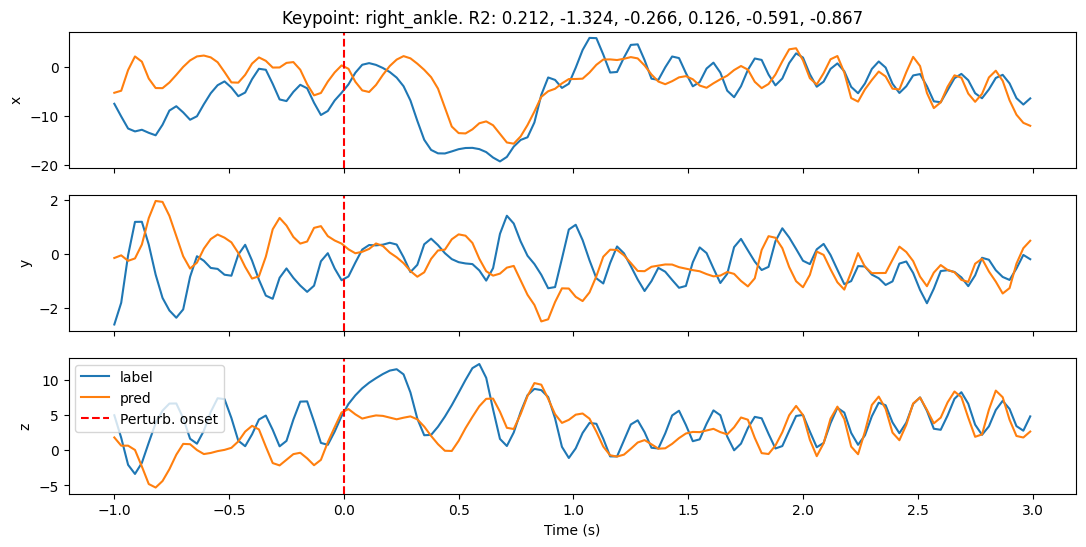

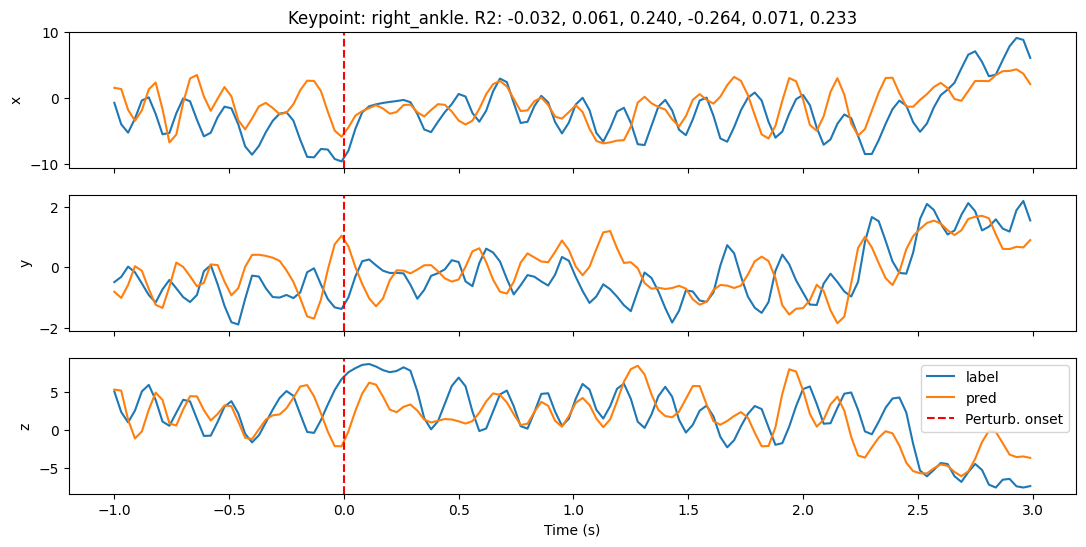

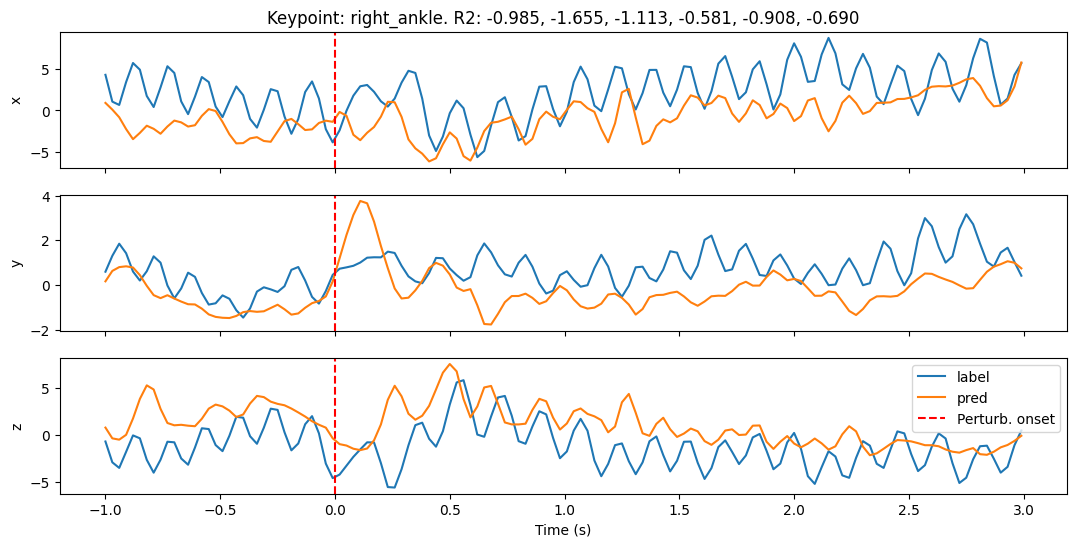

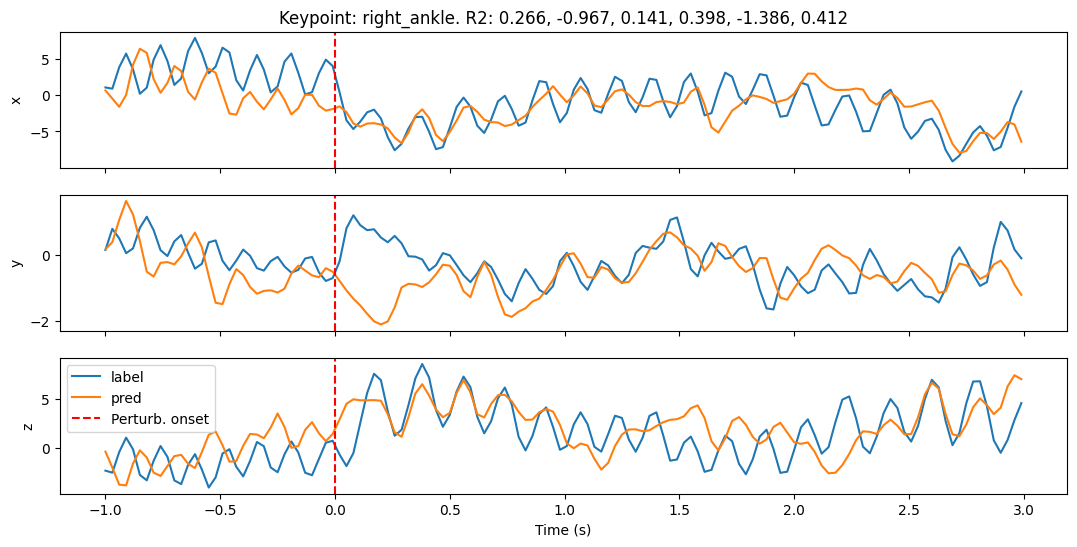

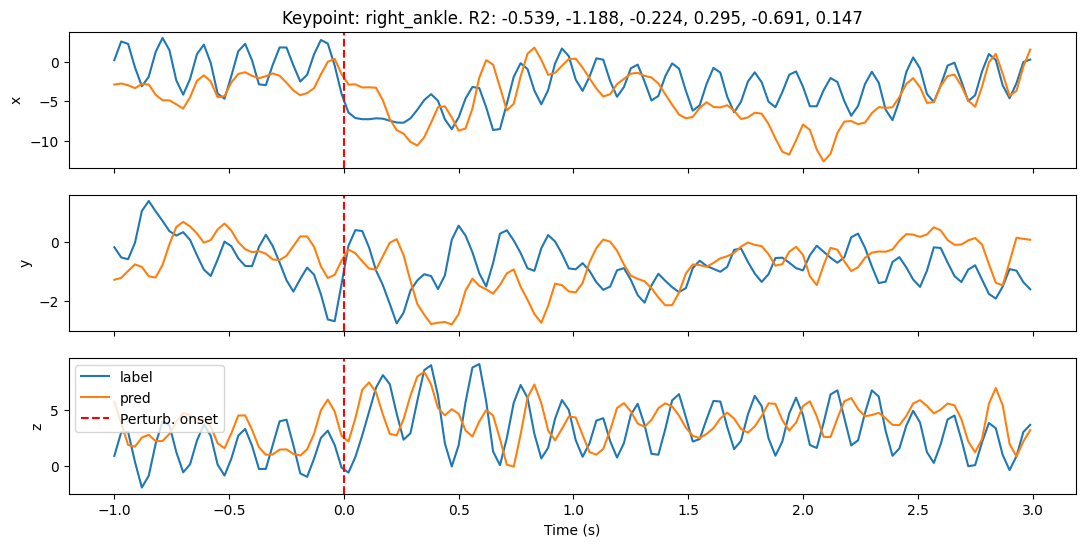

In [83]:
from sklearn.metrics import r2_score
trials = 10
column = 0

preds = model.example_preds
labels = model.example_labels

def plot_timepoints_lstm_example(preds, labels, keypoints, time_points=[100, 500], bin_size=0.03):
    times = np.arange(time_points[0] * bin_size, time_points[1]* bin_size, step=bin_size)
    for keypoint in keypoints:
        fig, axes = plt.subplots(3, 1, sharex='all', figsize=(13, 6))
        r2 = r2_score(labels[time_points[0]:time_points[1], :], preds[time_points[0]:time_points[1], :], multioutput='raw_values')
        r2_str = ', '.join([f'{r:.3f}' for r in r2])
        axes[0].set_title(f'Keypoint: {keypoint}. R2: {r2_str}')
        axes[-1].set_xlabel('Time (s)')
        for i, (dim_, ax) in enumerate(zip(['x', 'y', 'z'], axes)):
            ax.plot(times, labels[time_points[0]:time_points[1], i], label='label')
            ax.plot(times, preds[time_points[0]:time_points[1], i], label='pred')
            # ax.axvline(x=0, color='r', linestyle='dashed', label='Perturb. onset')
            ax.set_ylabel(f'{dim_}')
        axes[-1].legend()

def plot_trial_lstm_example(preds, labels, keypoints, trial_range=np.arange(5)):
    times = np.arange(-1, 3.01, step=0.03)
    for keypoint in keypoints:
        for trial in trial_range:
            fig, axes = plt.subplots(3, 1, sharex='all', figsize=(13, 6))
            r2 = r2_score(labels[trial, :, :], preds[trial, :, :], multioutput='raw_values')
            r2_str = ', '.join([f'{r:.3f}' for r in r2])
            axes[0].set_title(f'Keypoint: {keypoint}. R2: {r2_str}')
            axes[-1].set_xlabel('Time (s)')
            for i, (dim_, ax) in enumerate(zip(['x', 'y', 'z'], axes)):
                ax.plot(times, labels[trial, :, i], label='label')
                ax.plot(times, preds[trial, :, i], label='pred')
                ax.axvline(x=0, color='r', linestyle='dashed', label='Perturb. onset')
                ax.set_ylabel(f'{dim_}')
            axes[-1].legend()
                

plot_trial_lstm_example(preds, labels, keypoints=['right_ankle'])
# plot_timepoints_lstm_example(preds, labels, keypoints=['right_ankle', 'hip_center'], time_points=[500, 700])


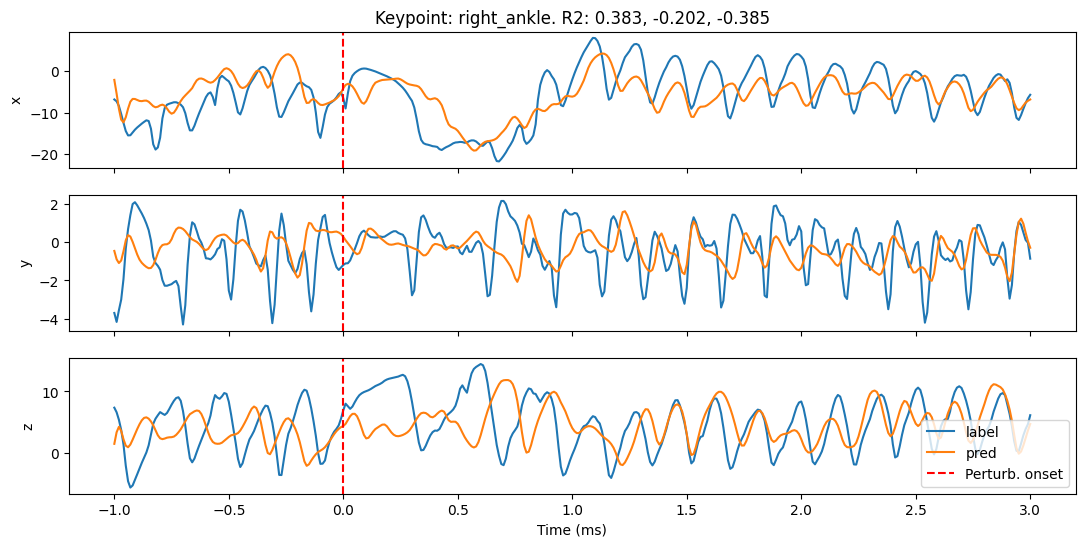

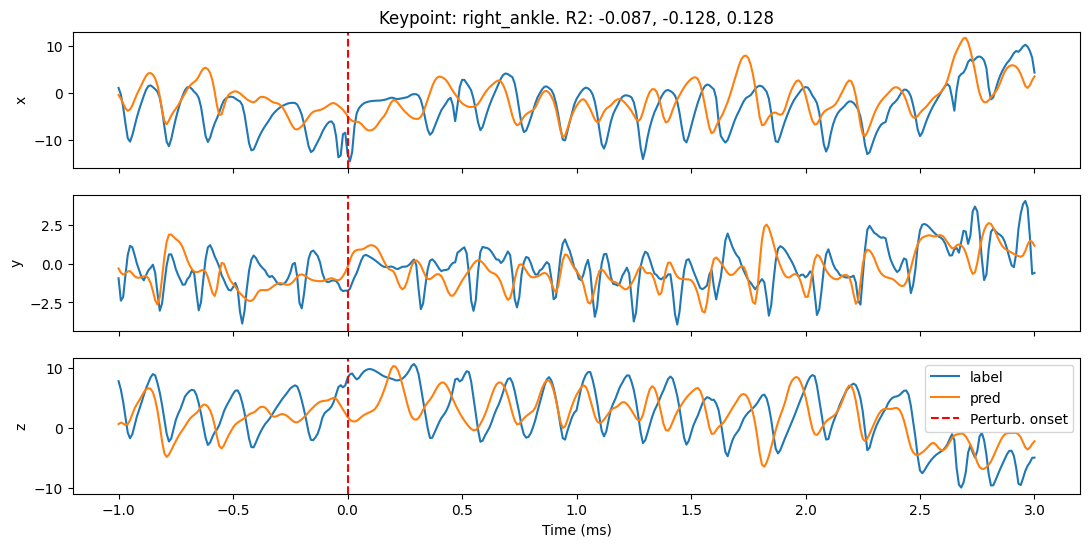

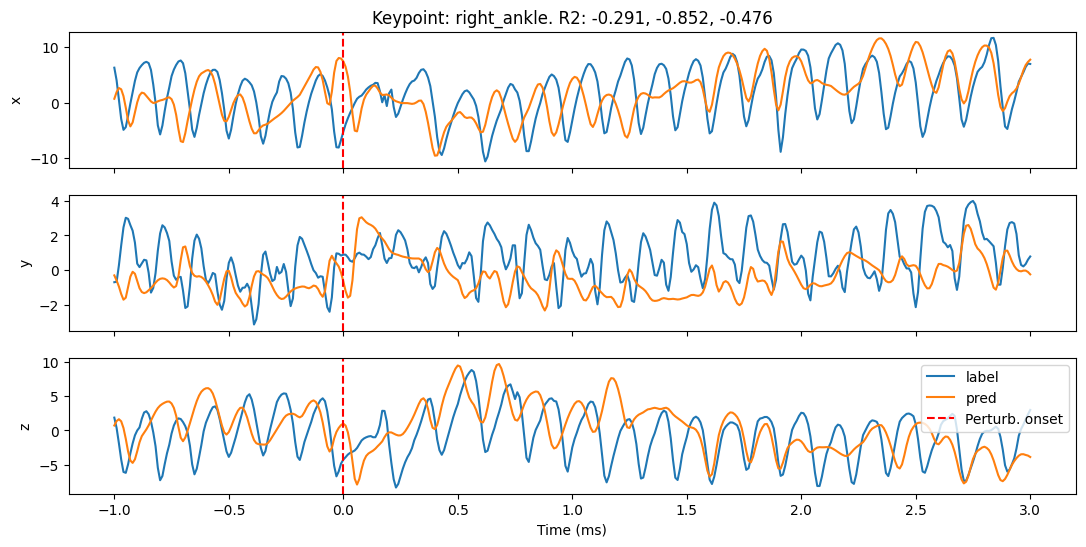

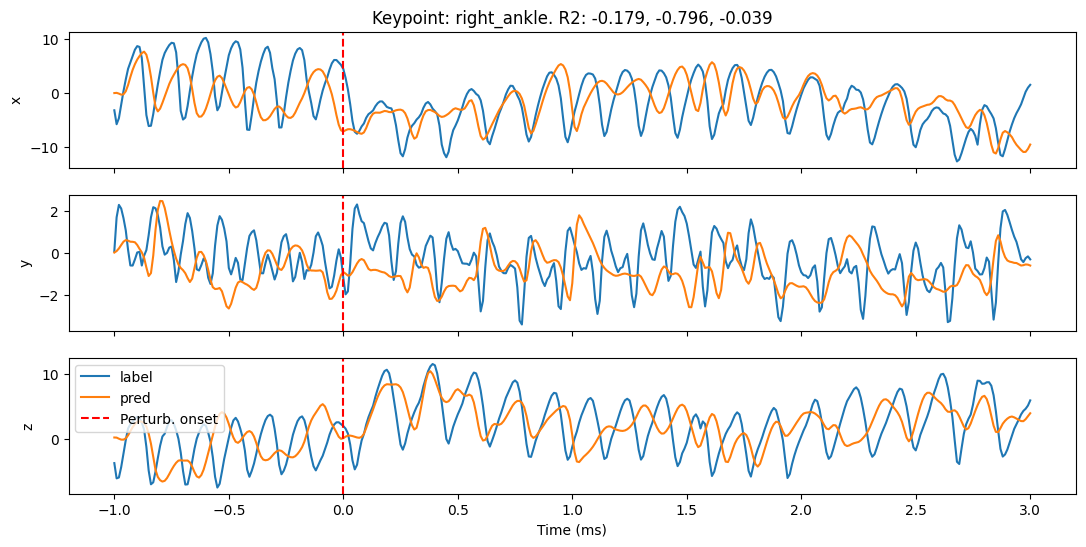

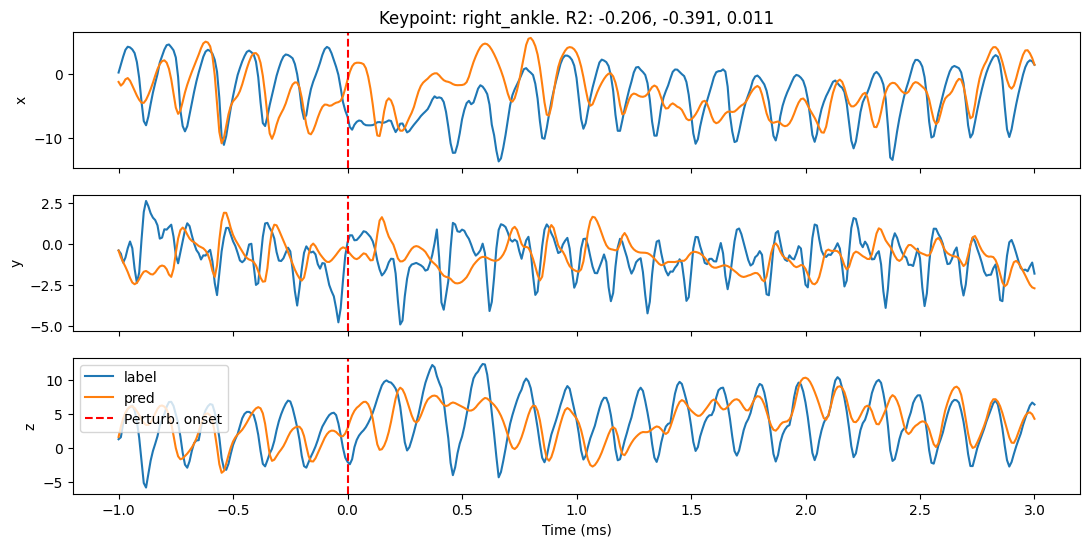

In [158]:
from sklearn.metrics import r2_score
trials = 10
column = 0

preds = model.example_preds
labels = model.example_labels


def plot_trial_lstm_example(preds, labels, keypoints, trial_range=np.arange(5)):
    times = np.arange(-1, 3.01, step=0.01)
    for keypoint in keypoints:
        for trial in trial_range:
            fig, axes = plt.subplots(3, 1, sharex='all', figsize=(13, 6))
            r2 = r2_score(labels[trial, :, :], preds[trial, :, :], multioutput='raw_values')
            r2_str = ', '.join([f'{r:.3f}' for r in r2])
            axes[0].set_title(f'Keypoint: {keypoint}. R2: {r2_str}')
            axes[-1].set_xlabel('Time (ms)')
            for i, (dim_, ax) in enumerate(zip(['x', 'y', 'z'], axes)):
                ax.plot(times, labels[trial, :, i], label='label')
                ax.plot(times, preds[trial, :, i], label='pred')
                ax.axvline(x=0, color='r', linestyle='dashed', label='Perturb. onset')
                ax.set_ylabel(f'{dim_}')
            axes[-1].legend()
                

plot_trial_lstm_example(preds, labels, keypoints=['right_ankle'])


## Load results

In [3]:
results_path = "/home/me24/repos/earthquake-analysis/results/lstm/"
with open(results_path + "lstm_r2_trial.pkl", "rb") as f:
    r2_dict = pickle.load(f)

In [23]:
np.mean(np.array(list(avg_keypoint_r2.values())), axis=1)


array([ 0.04299173, -0.10257697, -0.07988233,  0.06481776, -0.14320427,
       -0.12527335, -0.12331211,  0.07438968, -0.09323583, -0.07914826,
        0.09454096, -0.23926532, -0.07331828, -0.17778959, -0.13948922,
        0.13506292, -0.15197043, -0.19044832])

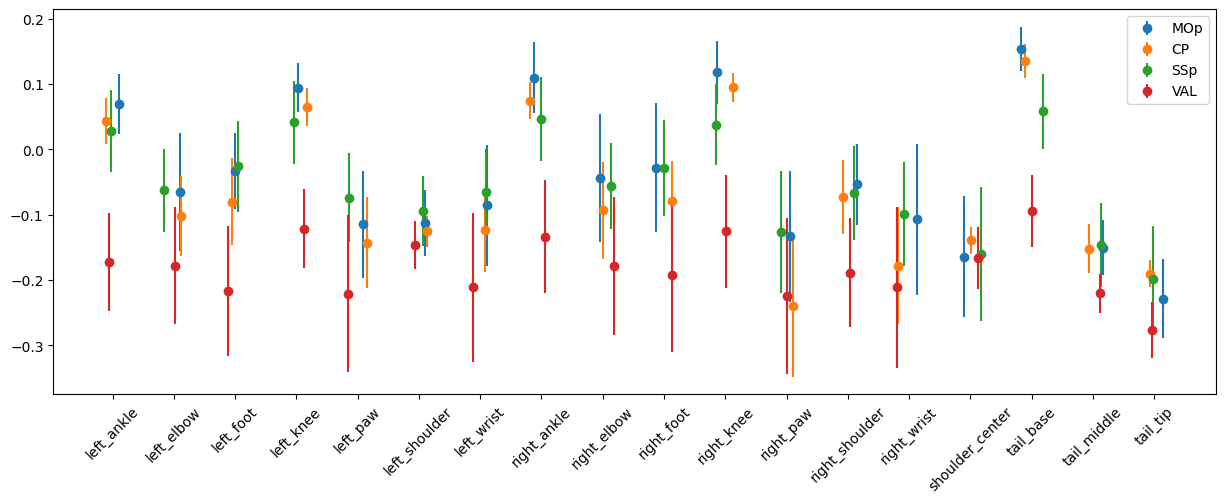

In [55]:
fig, ax = plt.subplots(figsize=(15, 5))
for area, per_area_r2 in r2_dict['keypoints'].items():

    keypoints = list(next(iter(per_area_r2.values())).keys())  # Get keypoints from the first fold
    avg_keypoint_r2 = {keypoint: [] for keypoint in keypoints}

    for fold in per_area_r2.values():
        for keypoint in keypoints:
            avg_keypoint_r2[keypoint].append(fold[keypoint])

    x = np.arange(len(avg_keypoint_r2.keys()))
    jitter_strength = 0.2  # Adjust the strength of the jitter
    x_jittered = x + np.random.uniform(-jitter_strength, jitter_strength, size=x.shape)

    values = np.array(list(avg_keypoint_r2.values()))
    ax.errorbar(x=x_jittered, y=np.mean(values, axis=1), yerr=scipy.stats.sem(values, axis=1), fmt='o', label=f'{area}')
    ax.set_xticks(x)
    ax.set_xticklabels(avg_keypoint_r2.keys(), rotation=45)

ax.legend()
plt.show()

## Load pipeline results

In [4]:
results_path = "/home/me24/repos/earthquake-analysis/results/lstm/experiment_1/"
with open(results_path + "results_r2.pkl", "rb") as f:
    r2_dict = pickle.load(f)

In [8]:
r2_dict['window'][0].keys()

dict_keys(['right_ankle', 'hip_center'])